# Innomactis Labs 

### By chaitanya Dubal


## EDA + Missing values and Outliers -  Detection and  treatment + Model Building

In [294]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [295]:
df = pd.read_csv('/home/chaitanyadubal/Downloads/adult.csv')

In [296]:
df.head(11)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [297]:
df.tail(11)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48831,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
48832,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
48833,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
48834,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Description

* The above data was extracted by Barry Becker from census database of 1994.Here the aim is to predict that whether a person makes over 50k a year or not.The dataset contains around 49,000 datapoints and many columns with continous and discrete data as seen.

*  The dataset got many different columns like age which has continuous values , workclass, education and martial-status also sex has discrete data and there are different columns like capitcal-loss and capital-gaina and etc.Which helps finding out if the person is able to make over 50k in a year.

In [298]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [299]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [300]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [301]:
pd.unique(df['workclass'])

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [302]:
pd.unique(df['education'])

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [303]:
pd.unique(df['marital-status'])

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [304]:
pd.unique(df['occupation'])

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [305]:
pd.unique(df['relationship'])

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [306]:
pd.unique(df['race'])

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [307]:
pd.unique(df['gender'])

array(['Male', 'Female'], dtype=object)

In [308]:
pd.unique(df['native-country'])

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [309]:
pd.unique(df['income'])

array(['<=50K', '>50K'], dtype=object)

### Frequency Distribution

In [310]:
df['fnlwgt'].describe()

count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

In [311]:
df['age'].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [312]:
df['educational-num'].describe()

count    48842.000000
mean        10.078089
std          2.570973
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: educational-num, dtype: float64

In [313]:
df['capital-gain'].describe()

count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [314]:
df['capital-loss'].describe()

count    48842.000000
mean        87.502314
std        403.004552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

In [315]:
df['hours-per-week'].describe()

count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

## Univariate Analysis

In [316]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [317]:
from numpy import nan
df = df.replace('?',nan)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [318]:
null_values = df.isnull().sum()
null_values = pd.DataFrame(null_values,columns=['null'])
j=1
sum_total=len(df)
null_values['percentage'] = null_values['null']/sum_total
round(null_values*100,3).sort_values('percentage',ascending=False)

,null,percentage
occupation,280900,5.751
workclass,279900,5.731
native-country,85700,1.755
age,0,0.000
fnlwgt,0,0.000
education,0,0.000
educational-num,0,0.000
marital-status,0,0.000
relationship,0,0.000
race,0,0.000


In [319]:
df['native-country'].fillna(df['native-country'].mode()[0],inplace = True)

In [320]:
df['workclass'].fillna(df['workclass'].mode()[0],inplace = True)

In [321]:
df['occupation'].fillna(df['occupation'].mode()[0],inplace = True)

In [322]:
null_values = df.isnull().sum()
null_values = pd.DataFrame(null_values,columns=['null'])
j=1
sum_total=len(df)
null_values['percentage'] = null_values['null']/sum_total
round(null_values*100,3).sort_values('percentage',ascending=False)

,null,percentage
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
educational-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
gender,0,0.0


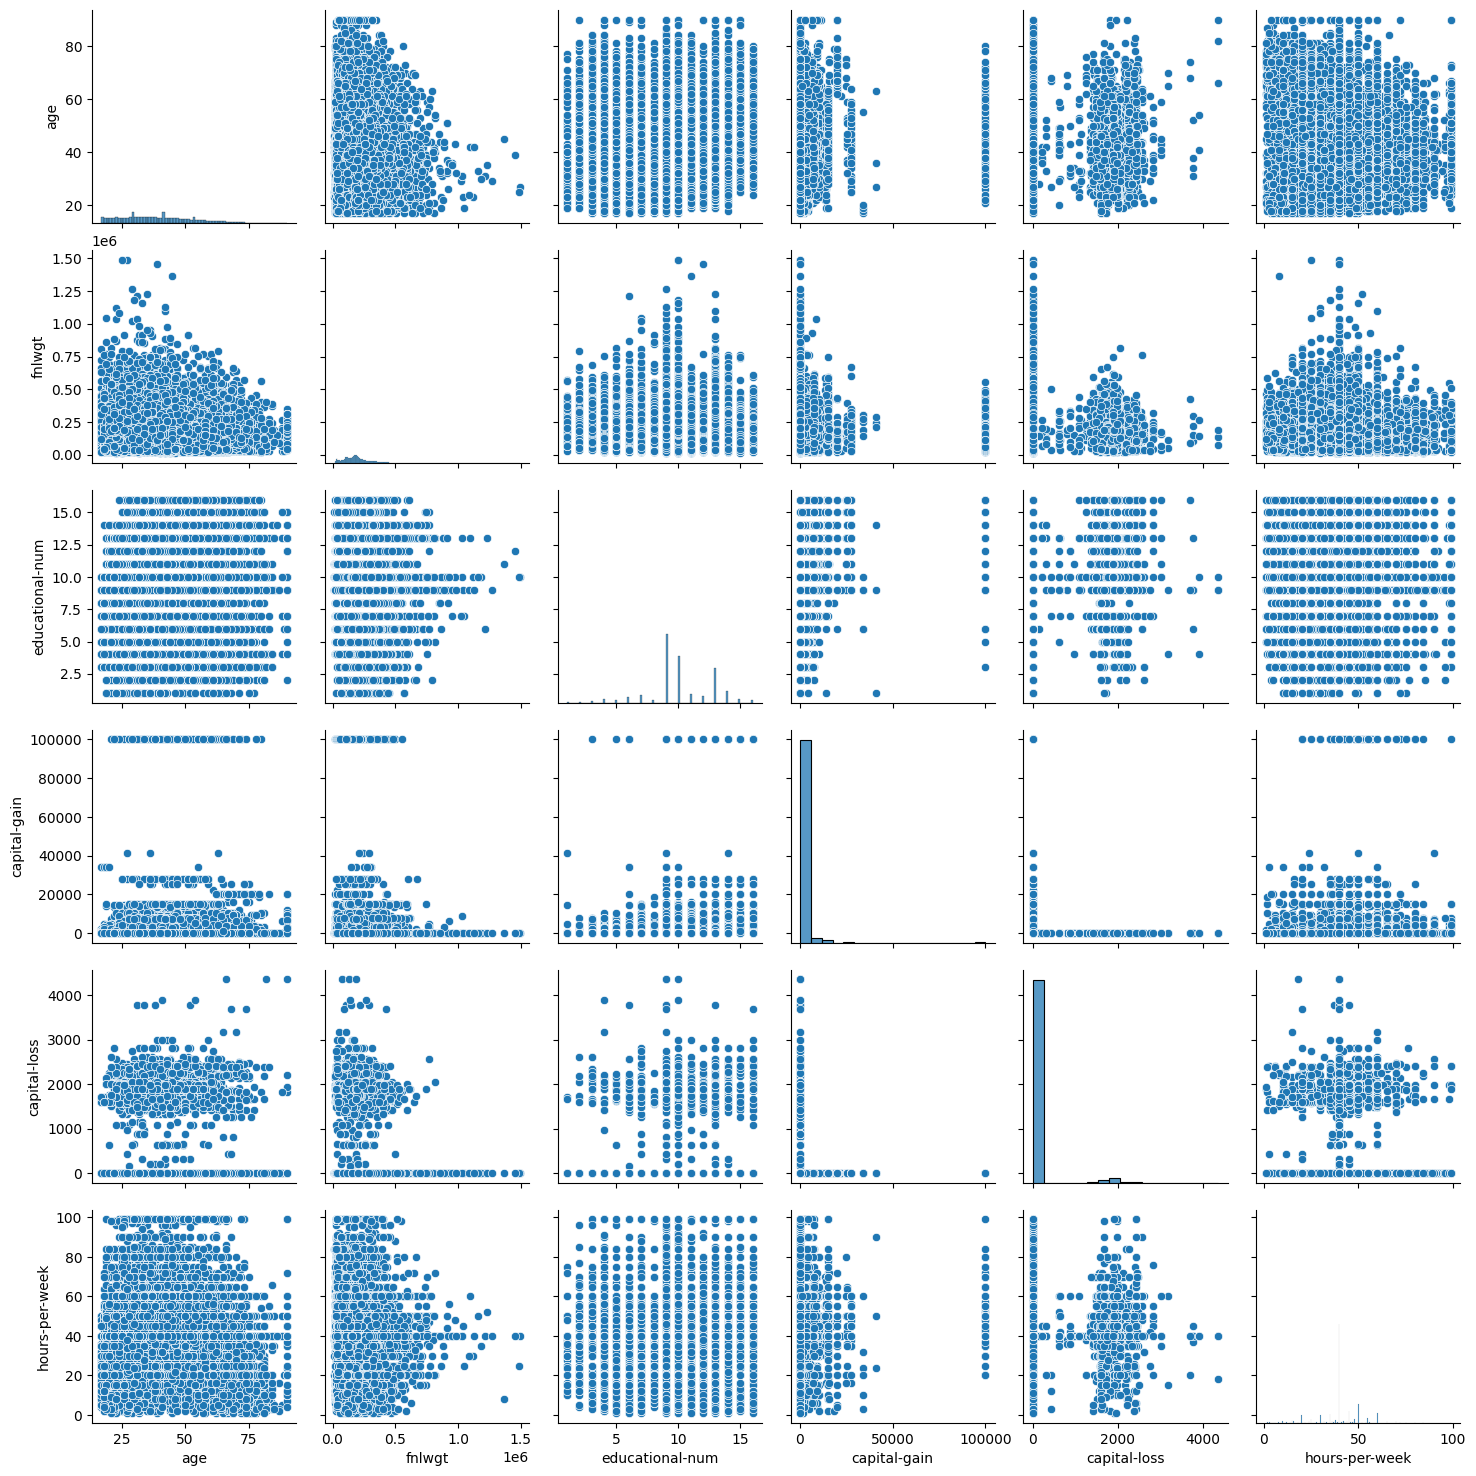

In [323]:
sns.pairplot(df)

<function matplotlib.pyplot.show(close=None, block=None)>

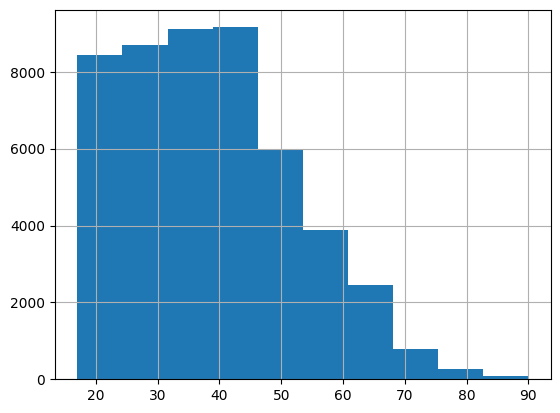

In [324]:
df['age'].hist()
plt.show

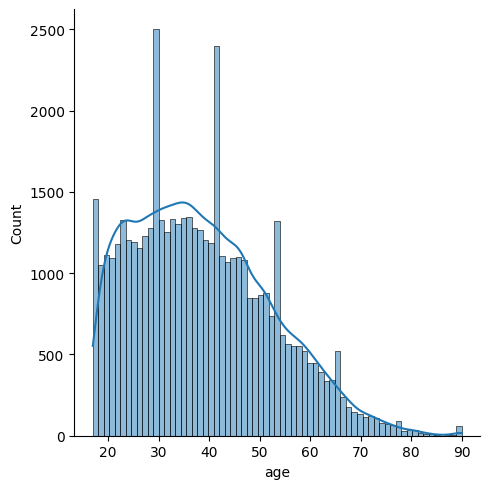

In [325]:
sns.displot(df['age'], kde=True)

* By observation age attribute is right-skewed and not symetric. min and max age in btw 17 to 90

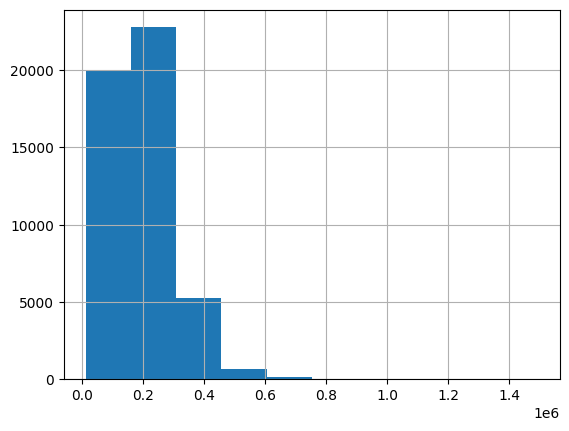

In [326]:
df['fnlwgt'].hist()
plt.show()

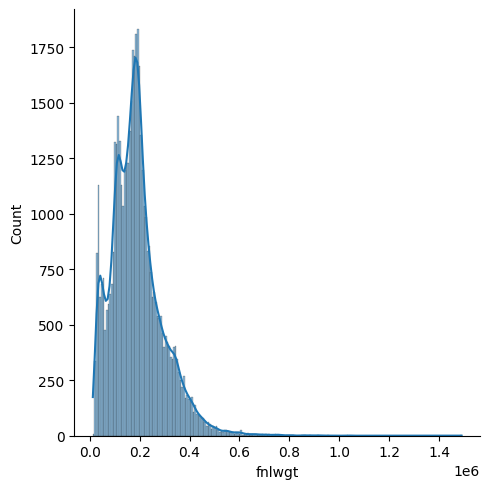

In [327]:
sns.displot(df['fnlwgt'], kde=True)

It seems like Rightly skewed

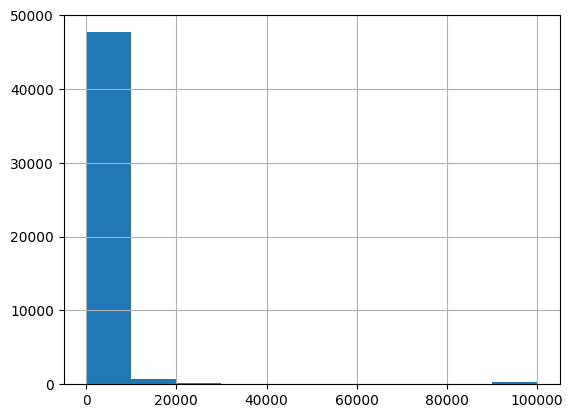

In [328]:
df['capital-gain'].hist()
plt.show()

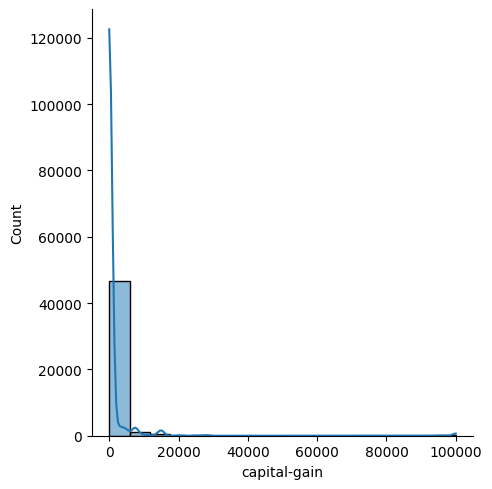

In [329]:
sns.displot(df['capital-gain'], kde=True)

capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k)

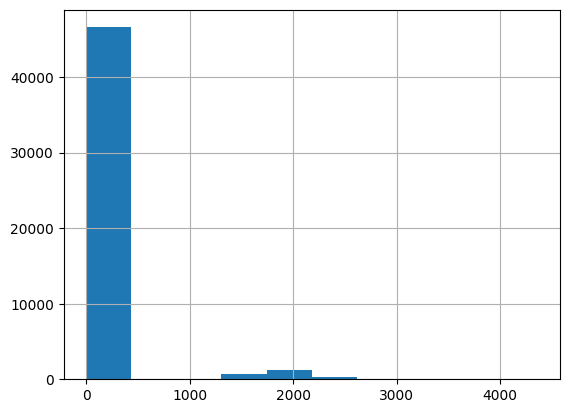

In [330]:
df['capital-loss'].hist()
plt.show()

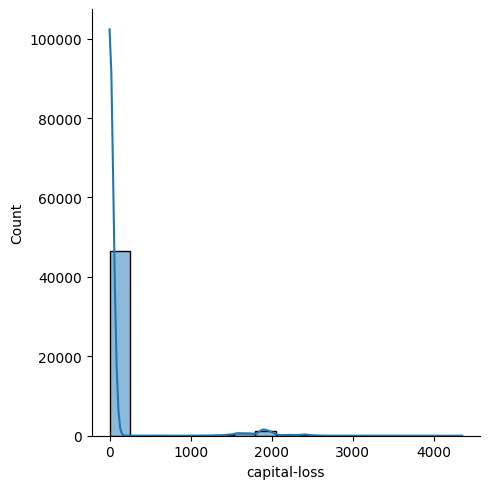

In [331]:
sns.displot(df['capital-loss'], kde=True)

This histogram shows that most of the "capital-loss" values are centered on 0 and only few are non zero(2282). This attribute is similar to the capital-gain i.e. most of the values are centered on 0

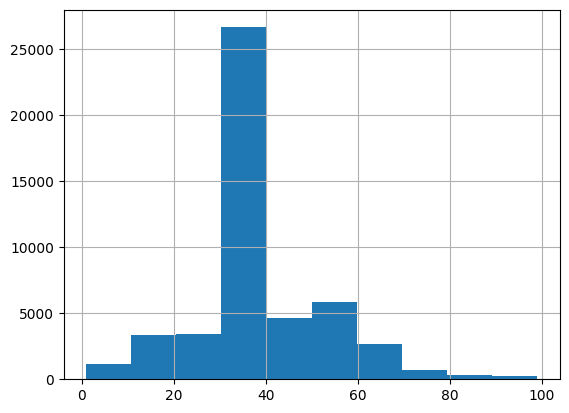

In [332]:
df['hours-per-week'].hist()
plt.show()

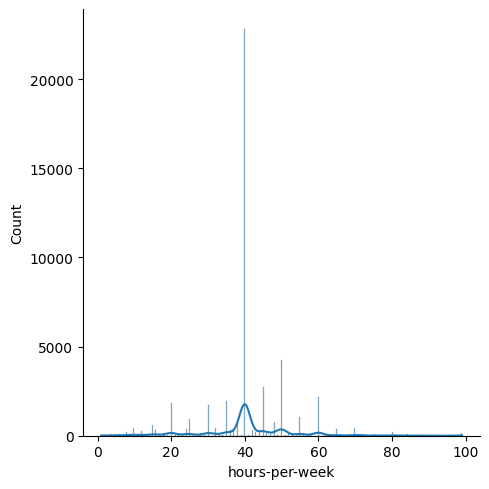

In [333]:
sns.displot(df['hours-per-week'], kde=True)

In this data the hours per week atrribute varies within the range of 1 to 99. By observayion,30-40 hrs people work per week,around 27000 people. There are also few people who works 80-100 hours per week and some less than 20 which is unusual.



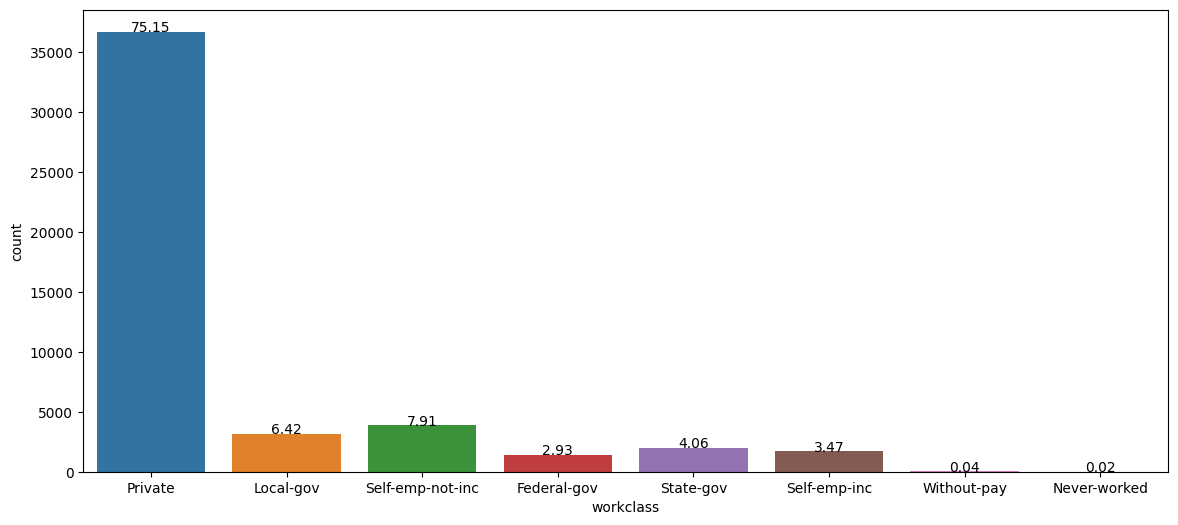

In [334]:
plt.figure(figsize=(14,6))
total = float(len(df['income']))
a= sns.countplot(x='workclass',data=df)

for x in a.patches:
    height = x.get_height()
    a.text(x.get_x() + x.get_width()/2., height+3 ,'{:1.2f}'.format((height/total)*100),ha="center")
plt.show()

most of them belong to private workclass that is around 75%. without-play and never-play workclass has min count



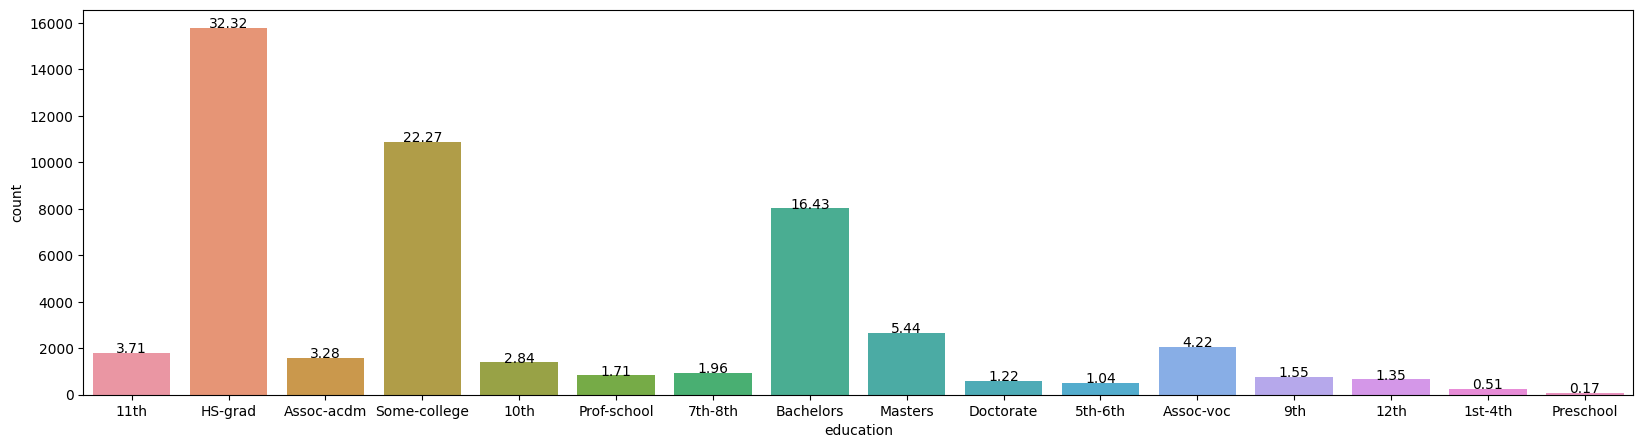

In [335]:
plt.figure(figsize=(20,5))

a= float(len(['income']))

a= sns.countplot(x='education',data=df)
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
plt.show()

Hs-grad has 32.32% of all the education attribute. pre-school has min.

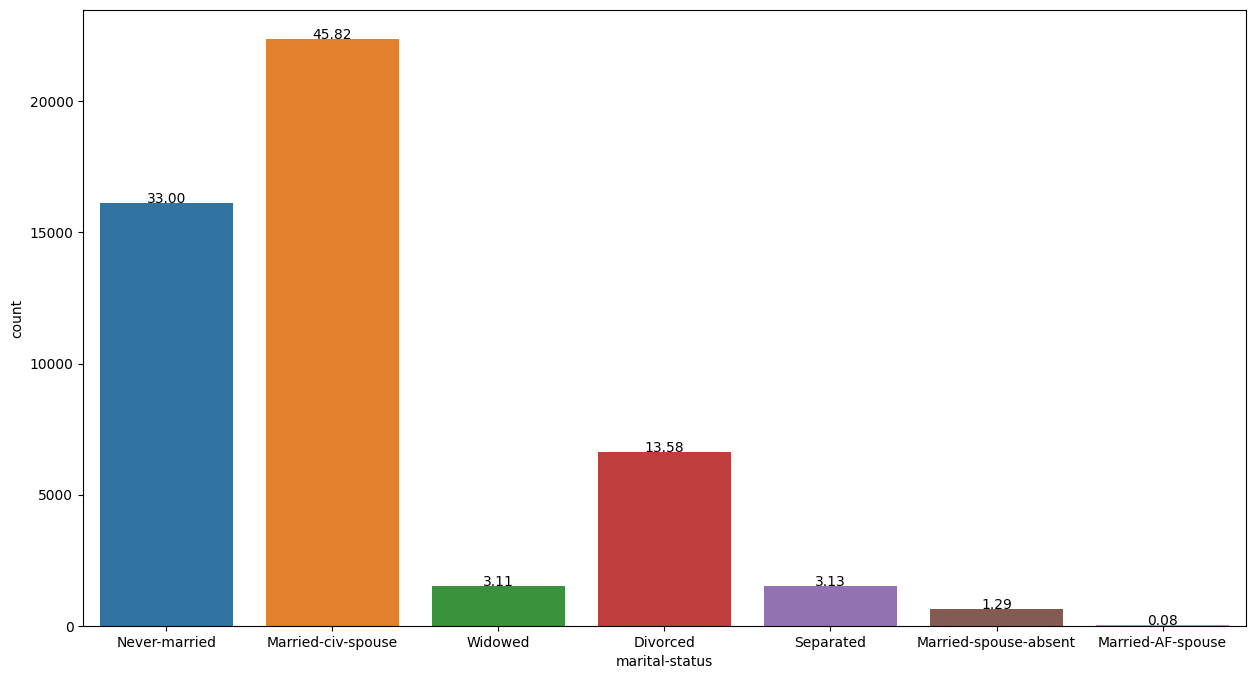

In [336]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="marital-status", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Married-civ-spouse has maximum number of samples.

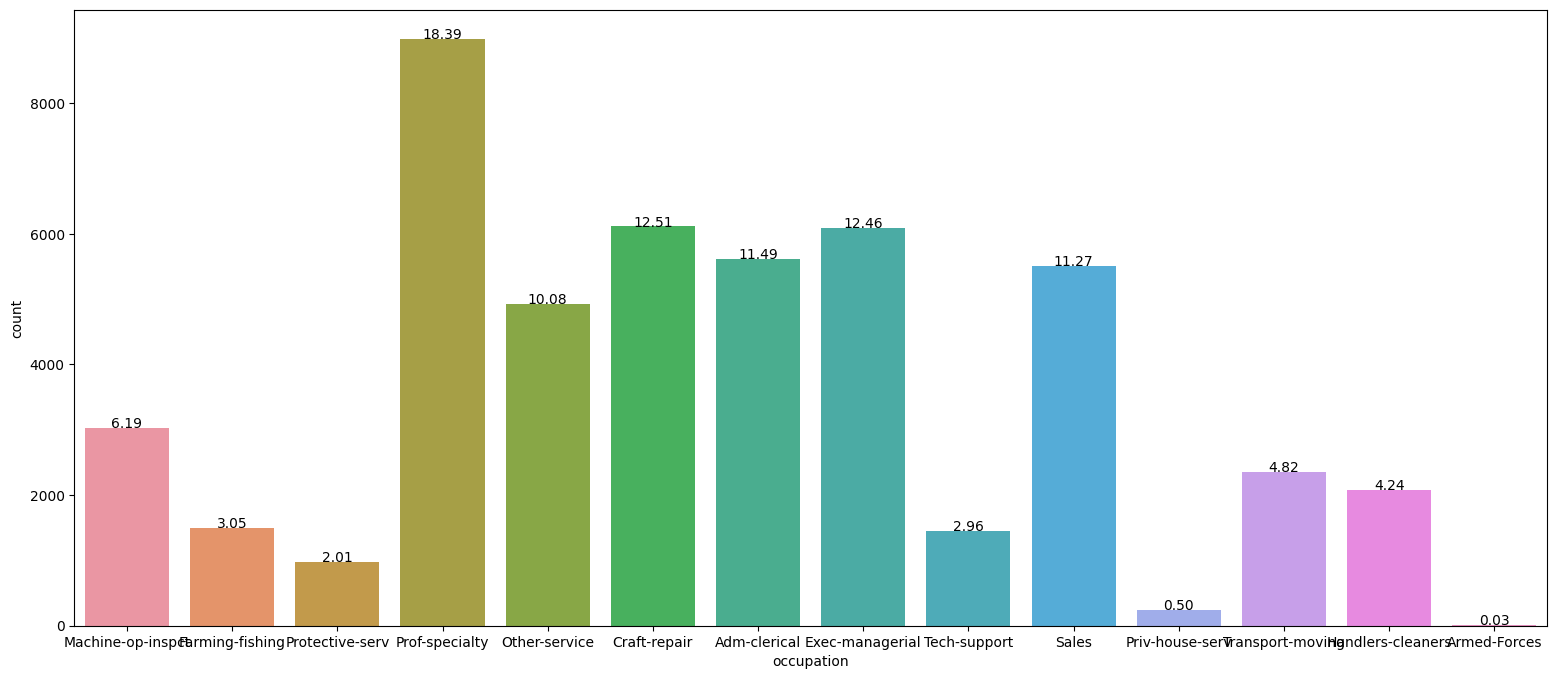

In [337]:
plt.figure(figsize=(19,8))
total = float(len(df) )

ax = sns.countplot(x="occupation", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Prof-specialty has the maximum count. Armed-Forces has minimum samples in the occupation attribute.

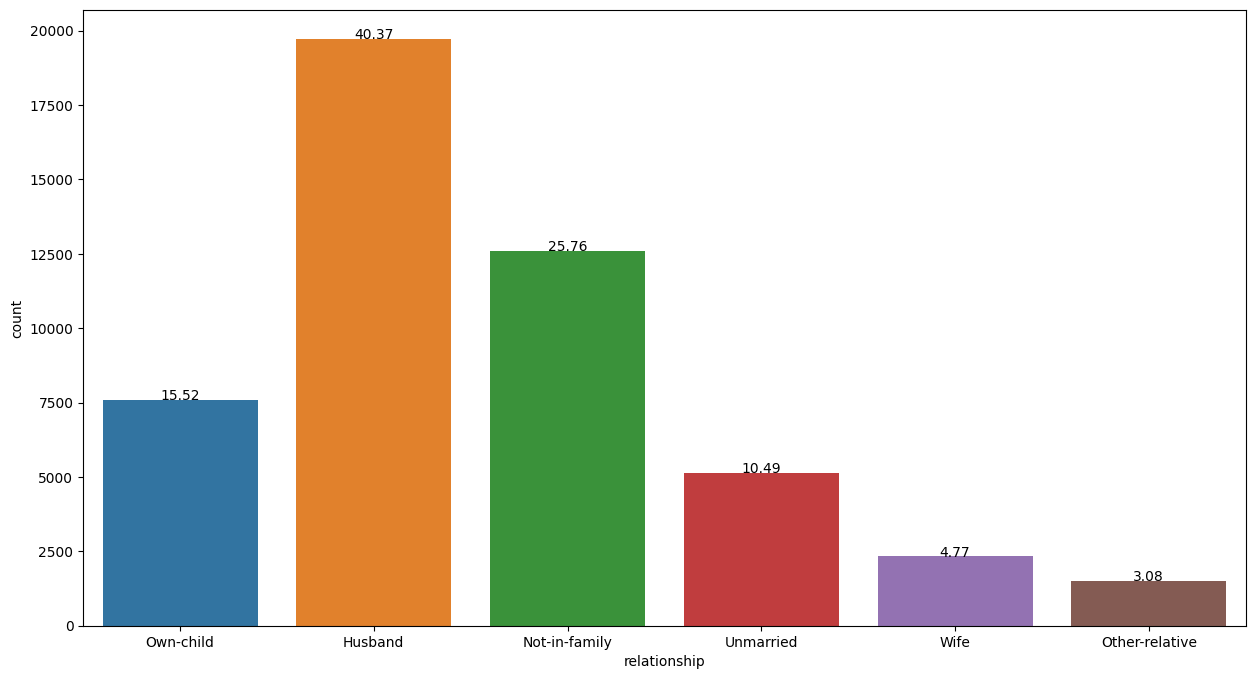

In [338]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="relationship", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Husband has maximum percentage among all.

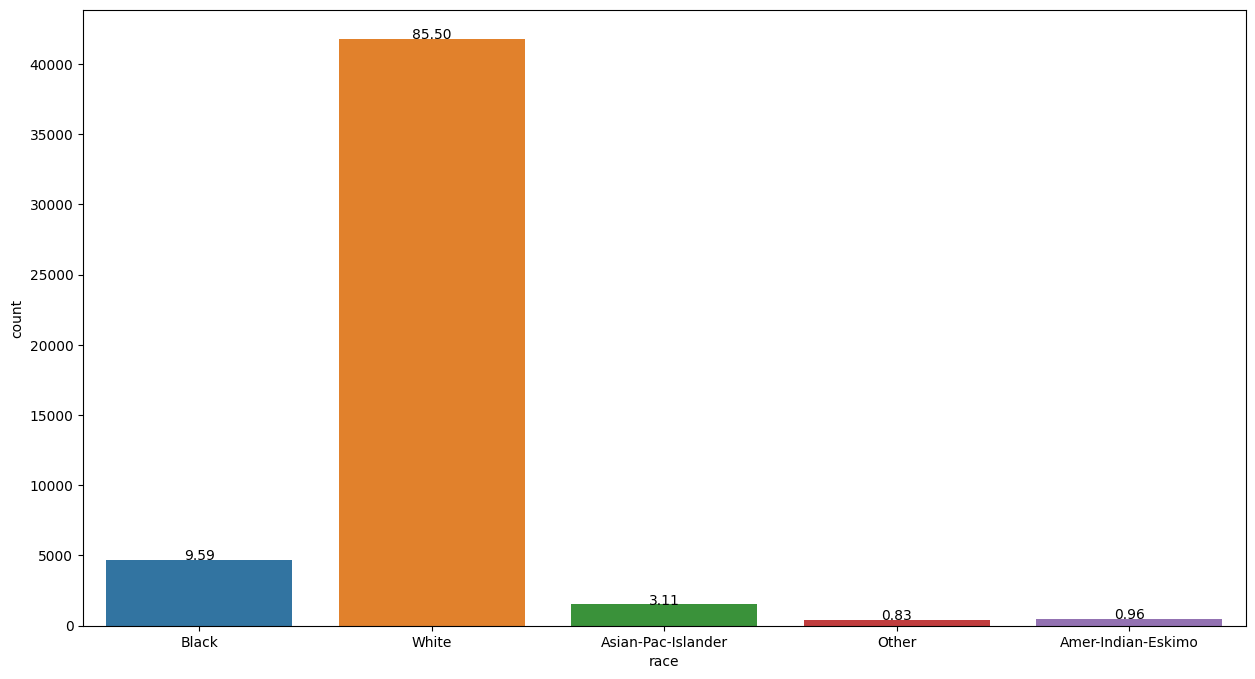

In [339]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="race", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

* White is maximun among all about 85.50%. black is second maximum.

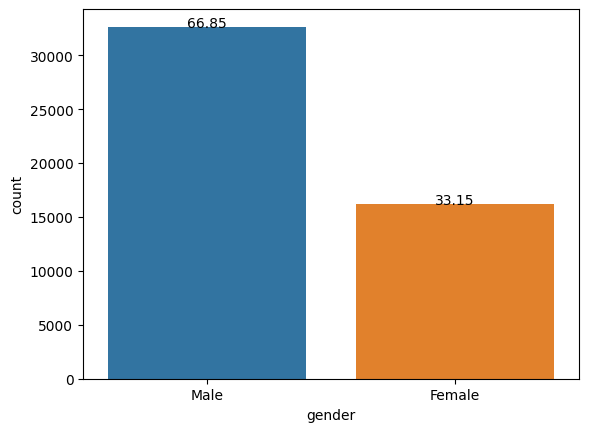

In [340]:
total = float(len(df) )

ax = sns.countplot(x="gender", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

there are 2 unique categories in gender. frequency of male is higher than female

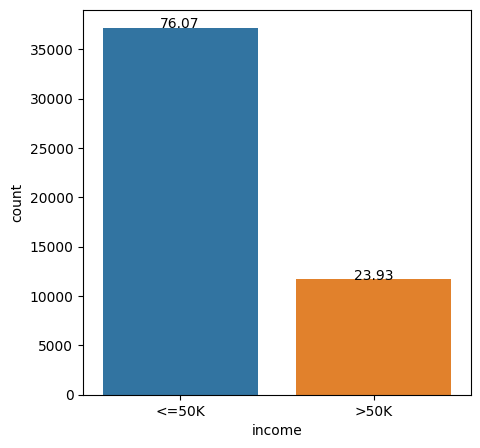

In [341]:
plt.figure(figsize=(5,5))
total = float(len(df) )

ax = sns.countplot(x="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In income there is 2 group,group1(who earns more than 50k) 23.93% belong to income and group2(who earns less than 50k) 76% belong to income

## Bivariate Analysis

<AxesSubplot:xlabel='workclass', ylabel='count'>

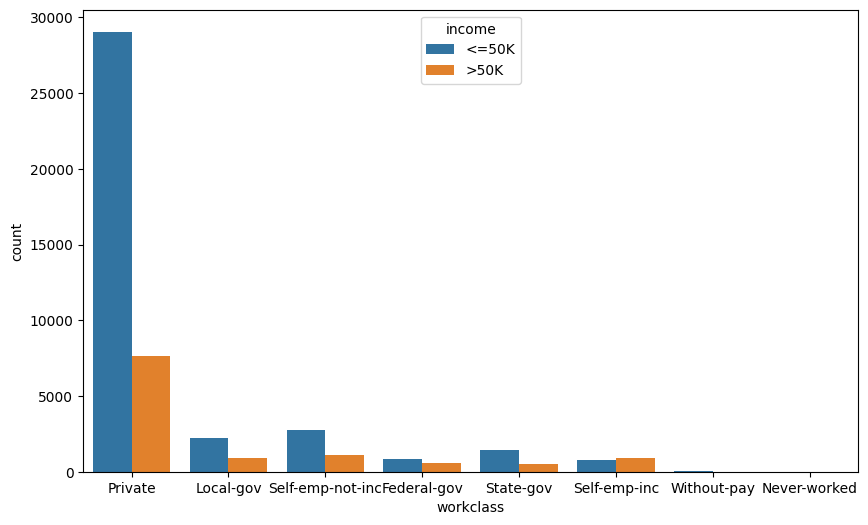

In [342]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='workclass',hue ='income',data=df)

In All the workclasses number of people earning less then 50k are more then those earning 50k.

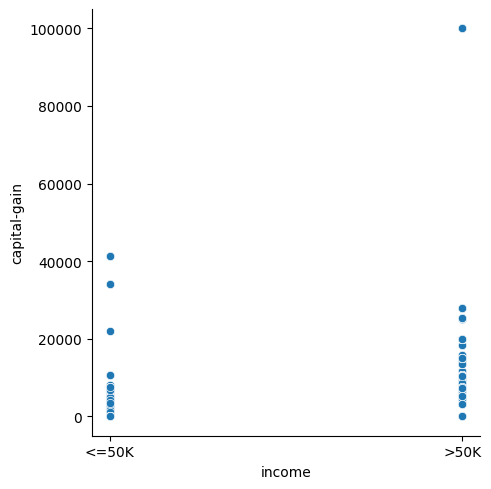

In [343]:
sns.relplot(x ="income", y ="capital-gain",
            data = df)

This relationplot is similar to the capital gain boxplot where most of the values are concentrated on 0

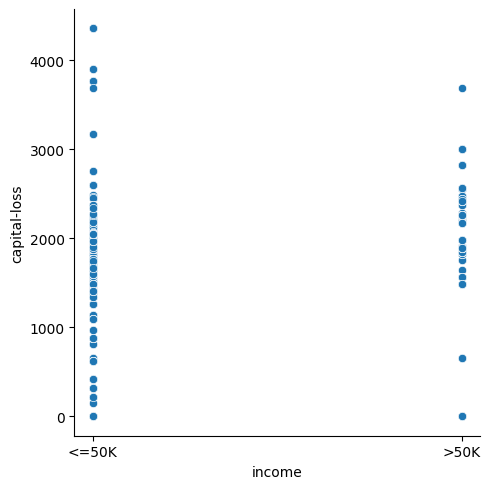

In [344]:
sns.relplot(x ="income", y ="capital-loss",
            data = df)

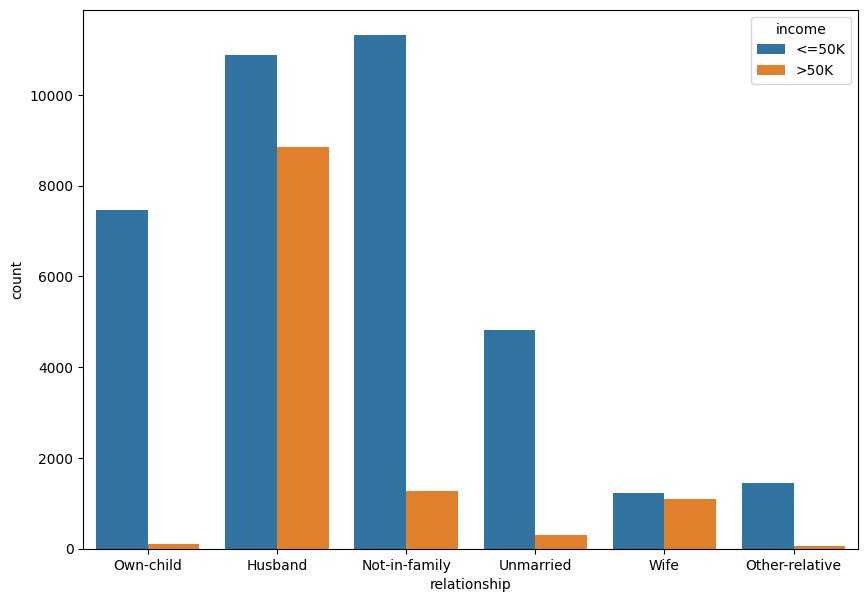

In [345]:
plt.figure(figsize=(10,7))
sns.countplot(x="relationship", hue="income",
            data=df);

Mostly a person with relation as husband in a family has most count of people with more then 50k income

<Figure size 2000x500 with 0 Axes>

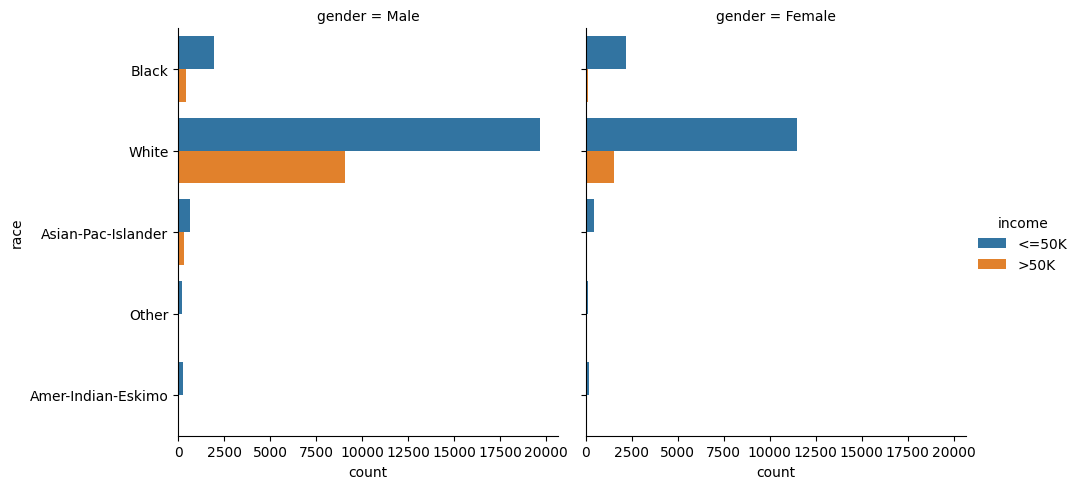

In [346]:
plt.figure(figsize=(20,5))
sns.catplot(y="race", hue="income", kind="count",col="gender", data=df);

It is clear people with Gender male and race as white has the most people with income more then 50k

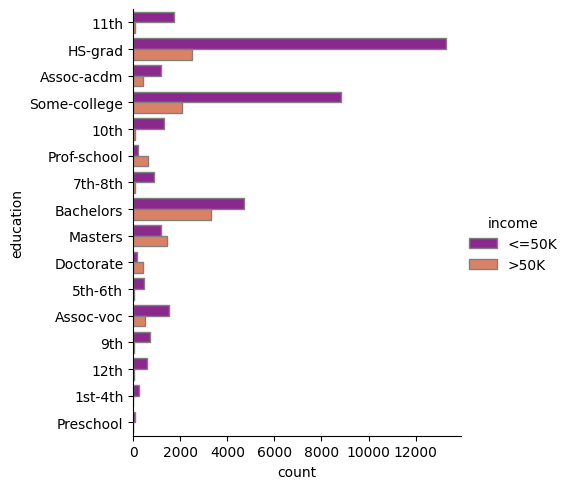

In [347]:
sns.catplot(y="education", hue="income", kind="count",
            palette="plasma", edgecolor=".5",
            data=df)

This data mostly consist of people who has education as hs-grad

<AxesSubplot:xlabel='count', ylabel='occupation'>

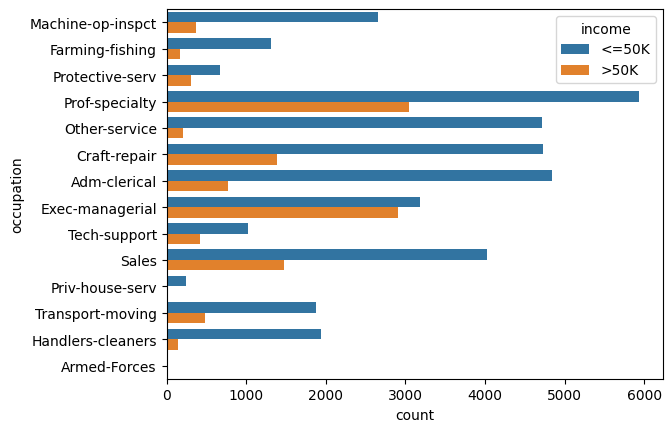

In [348]:
sns.countplot(y="occupation", hue="income",
            data=df)

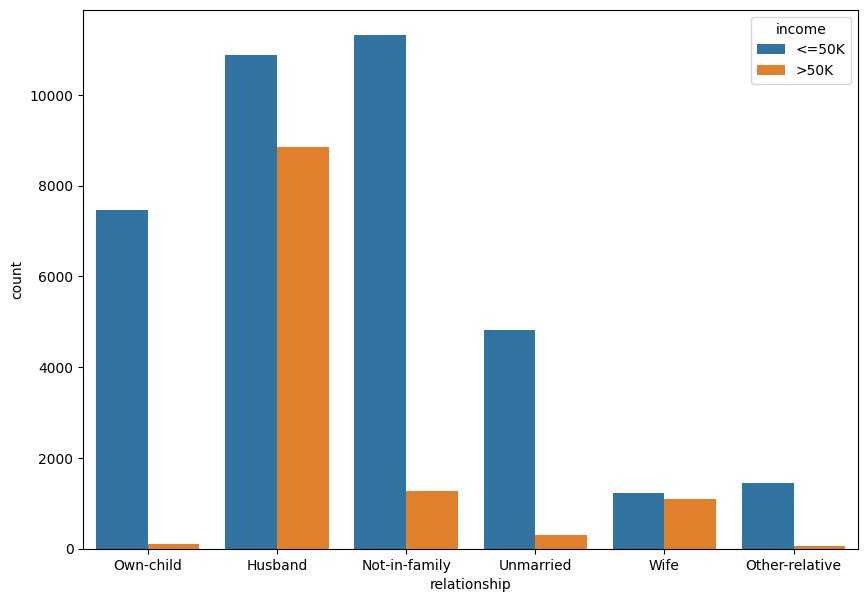

In [349]:
plt.figure(figsize=(10,7))
sns.countplot(x="relationship", hue="income",
            data=df);

<AxesSubplot:>

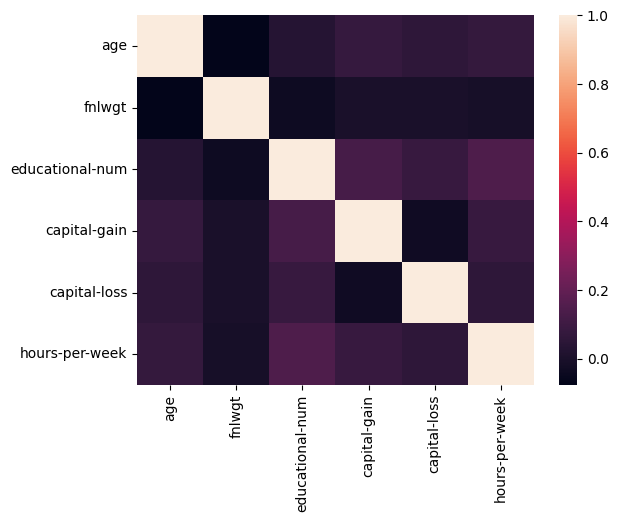

In [350]:
sns.heatmap(df.corr())

In [351]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [352]:
label = LabelEncoder()
std = StandardScaler()

In [353]:
df['education'] = label.fit_transform(df['education'])

In [354]:
df['marital-status'] = label.fit_transform(df['marital-status'])

In [355]:
df['relationship'] = label.fit_transform(df['relationship'])

In [356]:
df['race'] = label.fit_transform(df['race'])

In [357]:
df['gender'] = label.fit_transform(df['gender'])

In [358]:
df['workclass'] = label.fit_transform(df['workclass'])

In [359]:
df['occupation'] = label.fit_transform(df['occupation'])

In [360]:
df['income'] = label.fit_transform(df['income'])

In [361]:
df['native-country'] = label.fit_transform(df['native-country'])

In [362]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,18,3,103497,15,10,4,9,3,4,0,0,0,30,38,0


In [363]:
x = df.drop(df['income'])
y = df['income']

In [364]:
std.fit_transform(df)

array([[-0.99512893, -0.08972675,  0.35167453, ..., -0.03408696,
         0.25969378, -0.56084505],
       [-0.04694151, -0.08972675, -0.94552415, ...,  0.77292975,
         0.25969378, -0.56084505],
       [-0.77631645, -1.8902337 ,  1.3947231 , ..., -0.03408696,
         0.25969378,  1.78302368],
       ...,
       [ 1.41180837, -0.08972675, -0.35751025, ..., -0.03408696,
         0.25969378, -0.56084505],
       [-1.21394141, -0.08972675,  0.11198424, ..., -1.64812038,
         0.25969378, -0.56084505],
       [ 0.97418341,  0.81052673,  0.93049361, ..., -0.03408696,
         0.25969378,  1.78302368]])

In [365]:
x = df.drop(df['income'])
y = df['income']



In [368]:
print(x)

       age  workclass  fnlwgt  education  educational-num  marital-status  \
2       28          1  336951          7               12               2   
3       44          3  160323         15               10               2   
4       18          3  103497         15               10               4   
5       34          3  198693          0                6               4   
6       29          3  227026         11                9               4   
...    ...        ...     ...        ...              ...             ...   
48837   27          3  257302          7               12               2   
48838   40          3  154374         11                9               2   
48839   58          3  151910         11                9               6   
48840   22          3  201490         11                9               4   
48841   52          4  287927         11                9               2   

       occupation  relationship  race  gender  capital-gain  capital-loss  

In [369]:
print(y)

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64


In [370]:
y = y.drop(48841)

In [371]:
print(y)

0        0
1        0
2        1
3        1
4        0
        ..
48836    0
48837    0
48838    1
48839    0
48840    0
Name: income, Length: 48841, dtype: int64


In [372]:
y = y.drop(48840)

In [373]:
print(y)

0        0
1        0
2        1
3        1
4        0
        ..
48835    1
48836    0
48837    0
48838    1
48839    0
Name: income, Length: 48840, dtype: int64


In [374]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

### Logistic Regression

In [375]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import confusion_matrix,classification_report

In [377]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [379]:
y_pred = logreg.predict(x_test)

In [380]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [381]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7460    0]
 [2308    0]]


In [382]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87      7460
           1       0.00      0.00      0.00      2308

    accuracy                           0.76      9768
   macro avg       0.38      0.50      0.43      9768
weighted avg       0.58      0.76      0.66      9768



/home/chaitanyadubal/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/chaitanyadubal/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/chaitanyadubal/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN

In [383]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.metrics import confusion_matrix,classification_report

In [384]:
classifier = KNeighborsClassifier(n_neighbors = 3, p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [388]:
y_pred = classifier.predict(x_test)

In [390]:
y_test

37359    0
46631    0
21033    0
3646     0
42099    0
        ..
44800    1
14939    0
40338    0
42336    0
36602    1
Name: income, Length: 9768, dtype: int64

In [391]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [392]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [397]:
print("The accuracy is", ac)

The accuracy is 0.6916461916461917


In [398]:
print(cm)

[[6384 1076]
 [1936  372]]


## Naive Bayes Classifier

In [399]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 
from sklearn.metrics import confusion_matrix,classification_report

In [400]:
gnb = GaussianNB()

In [401]:
gnb.fit(x_train, y_train)

GaussianNB()

In [402]:
y_pred = gnb.predict(x_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [403]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7637


### Decision Tree Classifier

In [404]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.metrics import confusion_matrix,classification_report

In [405]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [406]:
y_pred = tree_clf.predict(x_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [407]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.6249


### Random Forest

In [408]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.metrics import confusion_matrix,classification_report

In [410]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [411]:
y_pred = rf_clf.predict(x_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [412]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7530
